# Introduction

One of the biggest diseases that has plagued the human kind in the modern era is breast cancer. Infact, in the United States, after skin cancer, breast cancer is considered to be the most common cancer disease.

Although cancer generally has a lot of serious implications to the body, it is to be noted that an early diagnosis coupled with good healthcare has led to many lives saved. It is extremely important for common people to be generally aware of some of the symptoms which have been mentioned below. Breast cancer has been seen in both men and women although it is much more common for women to develop symptoms than men. In fact, in USA, every 1 in 8 women may have the chance of being diagnosed with breast cancer.

In order to be more aware of the symptoms, we would work on the dataset provided by UCI ML to get a better understanding of the parameters that define a positive diagnosis for breast cancer.

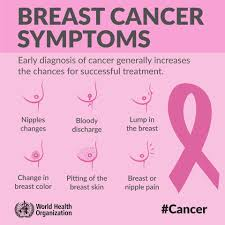


# Importing relevant libraries and datasets


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode (connected = True)

In [ ]:
pd. set_option('display.max_columns', None)
df=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

# Data Cleaning

Let us check if there is any requirement of data cleaning for this particular dataset. We shall first check for any null values.

In [ ]:
df.isna().any()

As we can see, apart from the final column, every other column has no null values. Infact the last column shows no information addition. Hence, we shall simply drop it from our analysis. Patient ID provides no additional info aswell. Hence we can drop this as well. Apart from that, we can head over to data visualisation since the data provided doesn't require any further pre-processing.

In [ ]:
df=df.iloc[:,1:-1]

# Data Visualisation

## a) Final diagnosis

Let us first check what percentage of diagnosis is malignant and benign. A malignant diagnosis generally requires immediate healthcare attention.

In [ ]:
df['Count']=1
df_diag=df.groupby('diagnosis')['Count'].sum().reset_index()

In [ ]:
fig1=px.pie(df_diag,values='Count',names='diagnosis',hole=0.4)
fig1.update_layout(title='Diagnosis distribution',title_x=.5,
                   annotations=[dict(text='Diagnosis',font_size=20, 
                   showarrow=False,height=800,width=700)])



fig1.show()

As we can see, about 37.3 % of the women have developed malignant breast cancer which requires immediate attention.

## b) Key parameters

Over here, we shall check how the key parameters change for both benign and malignant patients. Since the values of each feature vary by a large margin, we shall standardise the entries first.


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df.iloc[:,1:-1]),columns=df.iloc[:,1:-1].columns)

In [ ]:
df_scaled=pd.merge(df['diagnosis'],df_scaled,on=df_scaled.index)

In [ ]:
df_scaled.drop('key_0',axis=1,inplace=True)

In [ ]:
data = pd.melt(df_scaled.iloc[:,:-1],id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

In [ ]:
fig2=px.violin(data,x='features',y='value',box=True,color='diagnosis',violinmode='overlay')
fig2.update_layout(violingap=0)
fig2.show()

In [ ]:
df_mean=df_scaled.iloc[:,:11]
data = pd.melt(df_mean,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

As we can see, the above visulisation is extremely cluttered due to too many features. We see that the features are divided into mean, se and worst. We shall visualise the 3 categories separately.

## c) Mean parameters

In [ ]:
fig3=px.violin(data,x='features',y='value',box=True,color='diagnosis',violinmode='overlay',labels={'value':'Scaled values'},color_discrete_sequence =['red','blue'])
fig3.update_layout(violingap=0,template='plotly_dark',title='Mean parameter distribution',title_x=0.5)
fig3.show()

As we can see,some of the above features vary enough for classification while the rest are nearly same for both malignant and benign patients. The ones that show clear difference in feature values amongst the benign and malignant patients will provide better classification power. From the above violin/boxplots, we see that the following show clear difference:

* radius_mean
* perimeter_mean
* area_mean
* compactness_mean
* concavity_mean
* concave_points_mean

## d) se parameters

Let us check the se parameters as given in the data.

In [ ]:
df_se=df_scaled.iloc[:,11:21]

df_se=pd.merge(df['diagnosis'],df_se,on=df_se.index)
df_se.drop('key_0',axis=1,inplace=True)
data = pd.melt(df_se,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

In [ ]:
fig4=px.violin(data,x='features',y='value',box=True,color='diagnosis',violinmode='overlay',color_discrete_sequence =['red','blue'],labels={'value':'Scaled values'})
fig4.update_layout(violingap=0,template='plotly_dark',title='SE parameter distribution',title_x=0.5)
fig4.show()

From the given SE parameters and their distribution, it is seen that the SE parameteres are very similar for both malign and benign breast cancer patients and maynot be good enough for classification.


## e) Worst parameters

Let us check the distribution of the worst parameters available to us.

In [ ]:
df_worst=df_scaled.iloc[:,21:]
df_worst=pd.merge(df['diagnosis'],df_worst,on=df_worst.index)
df_worst.drop('key_0',axis=1,inplace=True)

In [ ]:
data = pd.melt(df_worst,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

In [ ]:
fig5=px.violin(data,x='features',y='value',box=True,color='diagnosis',violinmode='overlay',color_discrete_sequence =['red','blue'],labels={'value':'Scaled values'})
fig5.update_layout(violingap=0,template='plotly_dark',title='Worst parameter distribution',title_x=0.5)
fig5.show()

Upon checking the worst parameter features, we see that there are a few features that could help in classification quite well. Some of these parameters are:

* radius_worst
* texture_worst
* perimeter_worst
* area_worst
* concave_points_worst


## f) Heatmap correlation

Since we have so many features available to us, it is important to check their correlation. Highly correlated values generally cause data leakage which is undesirable for us. Hence, we need to check for these featuers and try to remove them from our analysis.

In [ ]:
corrs=df_scaled.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrs,annot=True)

As we can see from the above correlation  heatmap, some of the parameters are highly correlated and will contribute to data leakage issues. One of the evident such features are the:

* radius
* perimeter
* area

Both area and perimeter are completely correlated to each other. The only independent parameter here is the radius. Let us check this using a pairgrid.

In [ ]:
df_sim=df_scaled.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df_sim, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="viridis")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

As can be seen from the KDE plots and scatter plots above, the features radius, perimeter and area are all correlated with a high degree. Hence, we shall drop all the permeter and area from our analysis.


# Feature selection

In this process, we shall choose only the important features for our further analysis. The features to be selected have been decided by visualising the various data.

In [ ]:
imp_feat=['diagnosis','radius_mean','compactness_mean','concavity_mean',
          'concave points_mean','radius_worst','texture_worst','concave points_worst']

df_scaled[imp_feat].head()

The above dataframe has all the features that we shall use for our classification purpose.


# Machine Learning

In this section, we shall be using a few ML algorithms that will help us to classify the data correctly as Malginant and Benign.

First, let us separate the target feature which is diagnosis from rest of the dataframe and encode it as:

1: Malignant

0: Benign

In [ ]:
df_scaled['diagnosis']=df_scaled['diagnosis'].replace({'M':1,'B':0})

In [ ]:
target=df_scaled['diagnosis']
df_scaled.drop('diagnosis',axis=1,inplace=True)

In [ ]:
X=df_scaled.values
Y=target

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,shuffle=True,random_state=0,test_size=0.25)

## a) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
reg_log=LogisticRegression()
reg_log.fit(X_train,y_train)

In [ ]:
reg_log.score(X_train,y_train)

In [ ]:
y_preds_log=reg_log.predict(X_test)
reg_log.score(X_test,y_test)

In [ ]:
conf_mat_log=confusion_matrix(y_preds_log,y_test)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = sns.heatmap(conf_mat_log,ax=ax,annot=True,cmap='summer')
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign','Malignant'],rotation=0)
ax.set_xlabel('Predicted',size=15)
ax.set_ylabel('Actual',size=15)
plt.title('Confusion matrix Logsitic Regression',size=15)
plt.figure(figsize=(10,8))

## b) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(max_depth=10,random_state=5)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
rfc.score(X_train,y_train)

In [ ]:
y_preds_rfc=rfc.predict(X_test)

In [ ]:
conf_mat_rfc=confusion_matrix(y_preds_rfc,y_test)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = sns.heatmap(conf_mat_rfc,ax=ax,annot=True,cmap='gnuplot')
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign','Malignant'],rotation=0)
ax.set_xlabel('Predicted',size=15)
ax.set_ylabel('Actual',size=15)
plt.title('Confusion matrix RFC',size=15)
plt.figure(figsize=(10,8))

# Conclusion

Both RFC and Logistic Regression have given us a very high classification accuracy. Hence, it can be said that the feature selection and feature scaling helped to provide a better classification power for both RFC and logistic regression.


# If you found this notebook useful, an upvote would be amazing ! :)